In [60]:
import pandas as pd

df = pd.read_csv('startup_funding.csv')
df.head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [61]:
sorted(df['Startup Name'].unique().tolist())
# unique is function
# this value give you list of startups

sorted(df['Investors Name'].unique().tolist())
# jab tumhe kabhi data sorted ke baad float or string aaye to 
# samaz lena ki kahi to missing values hai
# first you have to find missing values

TypeError: '<' not supported between instances of 'float' and 'str'

In [62]:
df['Investors Name']= df['Investors Name'].fillna('Undisclosed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3044 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [63]:
df.head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [64]:
# here we do some data cleaning steps
#  1.drop remark col
#  2.set index  sno
#  3.rename col
#  4.convert amount to cr to rs
#  5.date col
#  6.drapna

df.drop(columns=['Remarks'],inplace=True)


In [65]:
df.set_index('Sr No',inplace=True)

In [66]:
df.rename(columns={'Date dd/mm/yyyy': 'date','Startup Name':'startup','Industry Vertical':'vertical','SubVertical':'subvertical','City  Location':'city','InvestmentnType':'round','Amount in USD':'amount','Investors Name':'Investors'},inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   Investors    3044 non-null   object
 6   round        3040 non-null   object
 7   amount       2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [68]:
df['amount'] = df['amount'].fillna('0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   Investors    3044 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [69]:
# to remove commas
df['amount'] = df['amount'].str.replace(',','')


In [70]:
df['amount'] = df['amount'].str.replace('undisclosed','')

In [71]:
df['amount'] = df['amount'].str.replace('unknown','')

In [72]:
df = df[df['amount'].str.isdigit()]

In [73]:
df['amount']=df['amount'].astype('float')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3022 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3022 non-null   object 
 1   startup      3022 non-null   object 
 2   vertical     2851 non-null   object 
 3   subvertical  2097 non-null   object 
 4   city         2842 non-null   object 
 5   Investors    3022 non-null   object 
 6   round        3020 non-null   object 
 7   amount       3022 non-null   float64
dtypes: float64(1), object(7)
memory usage: 212.5+ KB


In [75]:
df.head(5)

,date,startup,vertical,subvertical,city,Investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [76]:
# this function will convert value tp indian crore rupees

def to_inr(doller):
    inr = doller * 93.8
    return inr / 10000000

to_inr(200000000)

1876.0

In [77]:
df['amount'] = df['amount'].apply(to_inr)

In [78]:
df.head(5)

,date,startup,vertical,subvertical,city,Investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1876.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.493936
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,172.206107
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.140000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.884000


In [79]:
pd.to_datetime(df['date'],errors = 'coerce')

Sr No
1      2020-09-01
2             NaT
3      2020-09-01
4      2020-02-01
5      2020-02-01
          ...    
3040          NaT
3041          NaT
3042          NaT
3043          NaT
3044          NaT
Name: date, Length: 3022, dtype: datetime64[ns]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3022 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3022 non-null   object 
 1   startup      3022 non-null   object 
 2   vertical     2851 non-null   object 
 3   subvertical  2097 non-null   object 
 4   city         2842 non-null   object 
 5   Investors    3022 non-null   object 
 6   round        3020 non-null   object 
 7   amount       3022 non-null   float64
dtypes: float64(1), object(7)
memory usage: 212.5+ KB


In [81]:
df.head(5)

,date,startup,vertical,subvertical,city,Investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1876.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.493936
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,172.206107
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.140000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.884000


In [82]:
df['date'].dt.month
# df['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3022 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3022 non-null   object 
 1   startup      3022 non-null   object 
 2   vertical     2851 non-null   object 
 3   subvertical  2097 non-null   object 
 4   city         2842 non-null   object 
 5   Investors    3022 non-null   object 
 6   round        3020 non-null   object 
 7   amount       3022 non-null   float64
dtypes: float64(1), object(7)
memory usage: 212.5+ KB


In [84]:
df = df.dropna(subset=['date','startup','vertical','city','Investors','round','amount'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2840 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2840 non-null   object 
 1   startup      2840 non-null   object 
 2   vertical     2840 non-null   object 
 3   subvertical  2089 non-null   object 
 4   city         2840 non-null   object 
 5   Investors    2840 non-null   object 
 6   round        2840 non-null   object 
 7   amount       2840 non-null   float64
dtypes: float64(1), object(7)
memory usage: 199.7+ KB


In [86]:
df.to_csv('startup_cleaned.csv',index=False)

In [87]:
df['Investors'].unique().tolist()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Undisclosed',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'Vijay Shekhar Sharma

In [88]:
set(df['Investors'].str.split(',').sum())
len(set(df['Investors'].str.split(',').sum()))
sorted(set(df['Investors'].str.split(',').sum()))
# here use set because set will find unique values

# dataframe la str lavun split lavle ki te ek list return karnar

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [89]:
df[df['Investors'].str.contains('IDG Ventures')].head(5)[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,13/04/2019,Tripoto,Social Media,New Delhi,Series B,33.687098
223,30/07/2018,Cure Fit,Consumer Internet,Bengaluru,Private Equity,1125.600000
259,02/05/2018,Bizongo,Consumer Internet,Mumbai,Private Equity,206.360000
310,26/04/2018,POPxo,Technology,Delhi,Private Equity,51.590000
439,07/12/2017,eShakti,Ecommerce,Chennai,Debt Funding,21.574000


In [90]:
df[df['Investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False).head(1)

startup
Cure Fit    1125.6
Name: amount, dtype: float64

<Axes: ylabel='amount'>

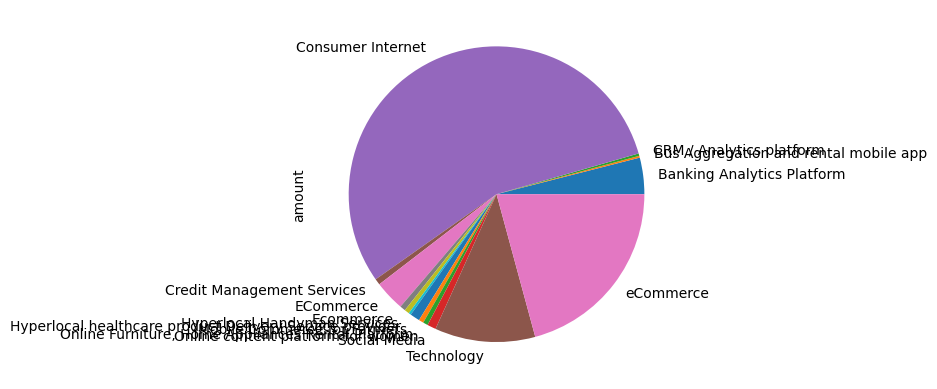

In [91]:
# for vertical col 
df[df['Investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

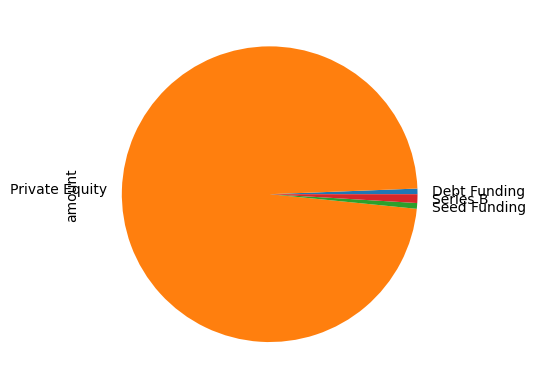

In [92]:
df[df['Investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')


In [93]:
# datetime values conversion
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['year'] = df['date'].dt.year

In [94]:
df.head(5)

,date,startup,vertical,subvertical,city,Investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1876.000000,2020.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.493936,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,172.206107,2020.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.140000,2020.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.884000,2020.0


In [95]:
# df[df['Investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()
df.head(5)

,date,startup,vertical,subvertical,city,Investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1876.000000,2020.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.493936,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,172.206107,2020.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.140000,2020.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.884000,2020.0


In [96]:
round(df['amount'].sum())

342962

In [97]:
round(df['amount'].max())


36582

In [98]:
df[df['amount'] == 36582]

,date,startup,vertical,subvertical,city,Investors,round,amount,year
Sr No,,,,,,,,,
61,NaT,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,36582.0,NaN


In [99]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

np.float64(36582.0)

In [100]:
df['month']=df['date'].dt.month

In [101]:
df.head()

,date,startup,vertical,subvertical,city,Investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1876.000000,2020.0,9.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.493936,NaN,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,172.206107,2020.0,9.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.140000,2020.0,2.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.884000,2020.0,2.0


In [102]:
df.head()

,date,startup,vertical,subvertical,city,Investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1876.000000,2020.0,9.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.493936,NaN,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,172.206107,2020.0,9.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.140000,2020.0,2.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.884000,2020.0,2.0


In [107]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()


In [111]:
temp_df['temp_x']= temp_df['month'].astype('str')+ '-' + temp_df['year'].astype('str')

In [112]:
temp_df

,year,month,amount,temp_x
0,2015.0,1.0,5997.103000,1.0-2015.0
1,2015.0,2.0,1781.834180,2.0-2015.0
2,2015.0,3.0,2175.362700,3.0-2015.0
3,2015.0,4.0,2211.288100,4.0-2015.0
4,2015.0,5.0,934.576300,5.0-2015.0
...,...,...,...,...
57,2019.0,11.0,1311.324000,11.0-2019.0
58,2019.0,12.0,1402.310000,12.0-2019.0
59,2020.0,2.0,45.024000,2.0-2020.0
60,2020.0,9.0,2048.206107,9.0-2020.0


In [114]:
temp_df[['amount','temp_x']]

,amount,temp_x
0,5997.103000,1.0-2015.0
1,1781.834180,2.0-2015.0
2,2175.362700,3.0-2015.0
3,2211.288100,4.0-2015.0
4,934.576300,5.0-2015.0
...,...,...
57,1311.324000,11.0-2019.0
58,1402.310000,12.0-2019.0
59,45.024000,2.0-2020.0
60,2048.206107,9.0-2020.0
